최적화: 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이죠.

**확률적 경사하강법(Stochastic Gradient Descent, SGD)**

 무작위로 배치 크기가 1인 단 한 개의 데이터를 추출하여 기울기를 계산하고, 경사 하강 알고리즘을 적용하는 방법을 말한다. 빠르게 최적점을 찾을 수 있지만 비교적 노이즈가 심하다는 단점이 있다. 추계적 경사 하강 기법이라고도 한다.




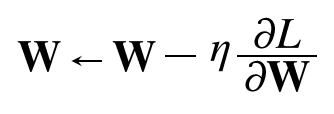

In [ ]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

def fn(x, y):
  """f(x, y) = (1/20) * x**2 + y**2"""
  return x**2 / 20 + y**2

def fn_derivative(x, y): # 함수 fn의 미분값
  return x/10, 2*y

# Sgd 클래스의 객체(인스턴스)를 생성
sgd = SGD(0.95)

# ex01 모듈에서 작성한 fn(x, y) 함수의 최솟값을 임의의 점에서 시작해서 찾아감.
init_position = (-7, 2)

# 신경망에서 찾고자 하는 파라미터의 초깃값
params = dict()
params['x'], params['y'] = init_position[0], init_position[1]

# 각 파라미터에 대한 변화율(gradient)
gradients = dict()
gradients['x'], gradients['y'] = 0, 0

# 각 파라미터들(x, y)을 갱신할 때마다 갱신된 값을 저장할 리스트
x_history = []
y_history = []
for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])
    gradients['x'], gradients['y'] = fn_derivative(params['x'], params['y'])  # gradients 갱신
    sgd.update(params, gradients)

for x, y in zip(x_history, y_history):
    print(f'({x}, {y})')

In [ ]:
# network = TwoLayerNet()
# optimizer = SGD()

# for i in range(10000):

#   x_batch, t_bath = get_mini_batch(...)
#   grads = network.gradient(x_bath, t_batch)
#   params = network.params
#   optimizer.update(params, grads)

SGD의 단점

: 비등방성함수 (anisotropy)
  - 방향에 따라 성질, 즉 기울기가 달라지는 함수

  

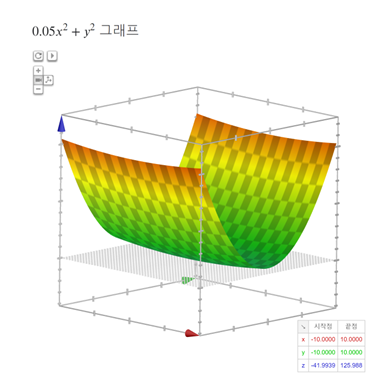

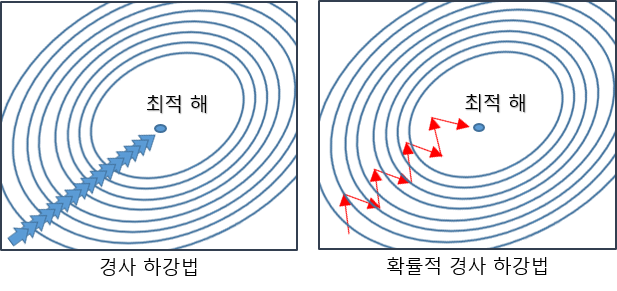

**모멘텀 (Momentum) 기법**

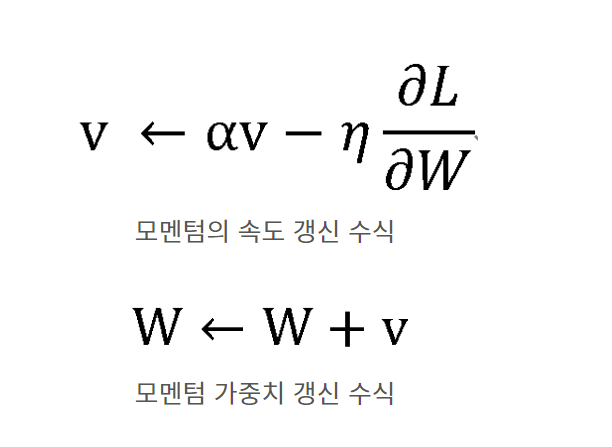

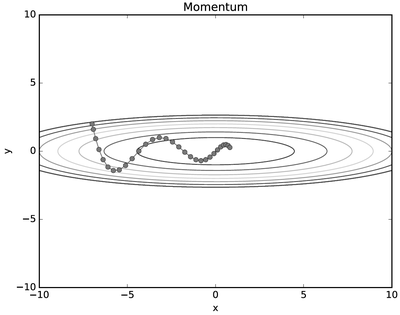

SGD와 비교했을 때 더 효율적인 경로로 최적해를 찾는 것을 확인할 수 있다. 이 변화의 원인은 x 축 방향으로 일정하게 가속되고 방향의 변화가 아주 작게 일어나기 때문이다.

In [ ]:
import numpy as np

class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr =lr
    self.momentum = momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

      for key in params.keys():
        self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
        params[key] += self.v[key]


**AdaGrad**

이 기법은 각각의 매개변수에 적응적으로 Adaptive 학습률 Learning rate을 조정하며 학습을 진행한다.

신경망 학습에서는 학습률(η ) 값이 굉장히 중요하다.
값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 발산하여 학습이 제대로 이뤄지지 않는다.

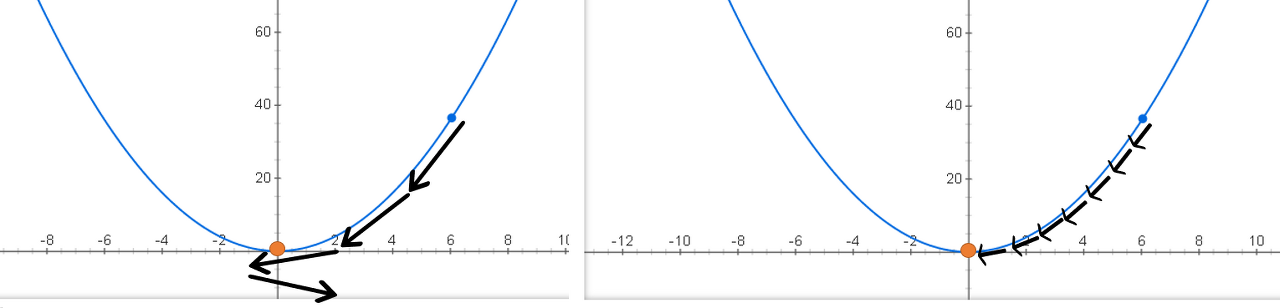

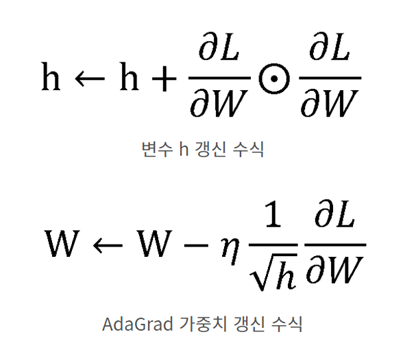

In [ ]:
class AdaGrad:

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
            # 0으로 나누는 일이 없도록 1e-7을 더해줍니다. 이 값은 임의로 지정 가능합니다.

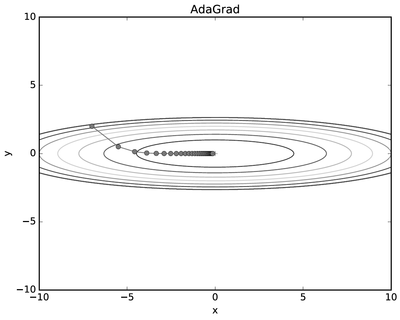

**은닉층 활성화값 분포**

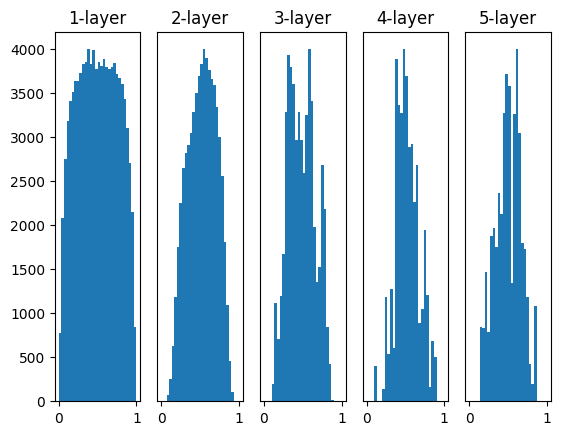

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()
